<a href="https://colab.research.google.com/github/annisakrnn/PCVK_Genap_2025/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D. PERCOBAAN FILTER

Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import math
import os
import glob
from google.colab.patches import cv2_imshow
from PIL import Image as im

Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [3]:
import numpy as np

def convolution2d(image, kernel, stride, padding):
    # Apply padding pada citra
    image = np.pad(image, padding, mode='constant', constant_values=0)

    # Mengambil ukuran kernel dan citra
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    # Calculate the size of the output image
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Initialize the output image
    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    # Convolution process
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height,
                                           x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

    return new_image

Load citra yang akan diproses dan ubah menjadi citra keabuan

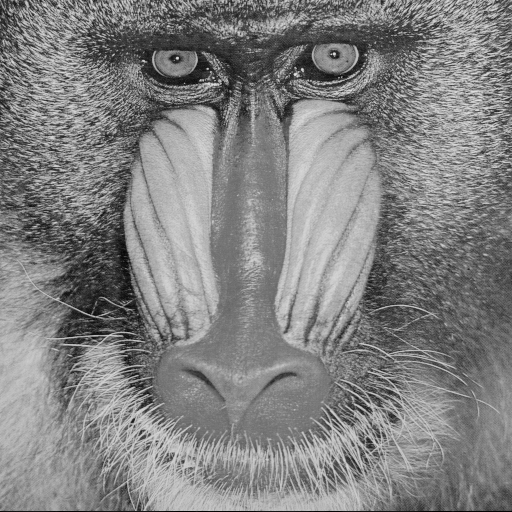

In [18]:
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

**Sharpen**

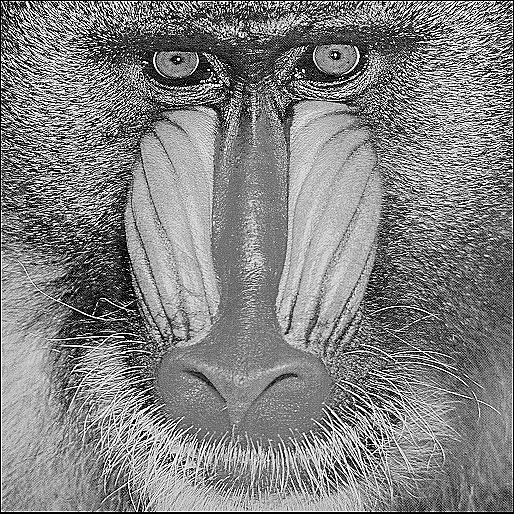

In [22]:
# Code kernel_sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

**Emboss**

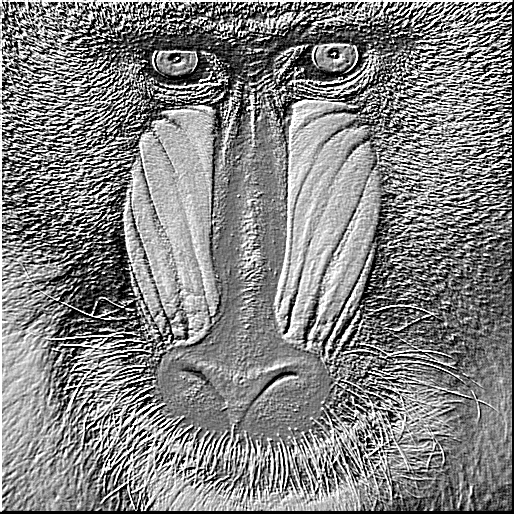

In [23]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

**Left Sobel Edge Detection**

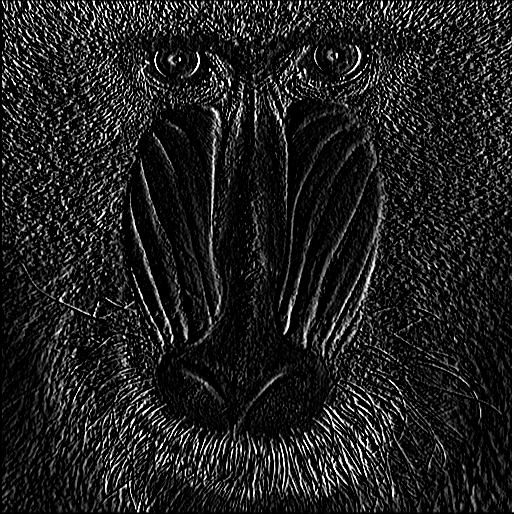

In [24]:
kernel_lsed = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_lsed, 1, 2))

**Canny Edge Detection**

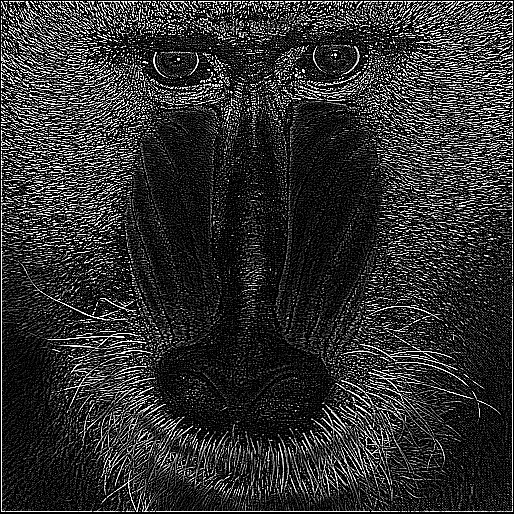

In [25]:
kernel_ced = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_ced, 1, 2))

**21x21 Gaussian Blur**

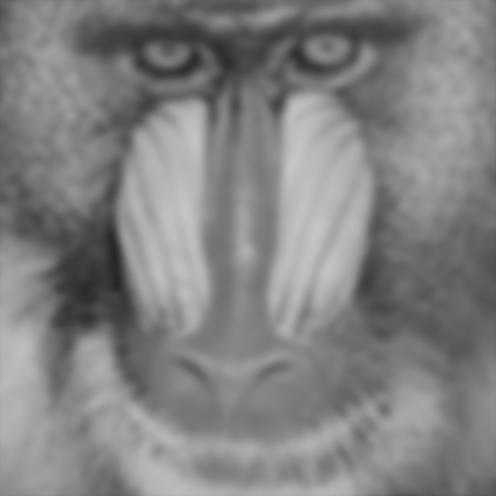

In [27]:
kernel_size = 21 #ukuran kernel

sigma = math.sqrt(kernel_size) # menghitung nilai sigma

# Buat kernel gaussian
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

# E. FILTER LIBRARY DAN FILTER MODERN

Percobaan 1:

Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library
filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat
fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.

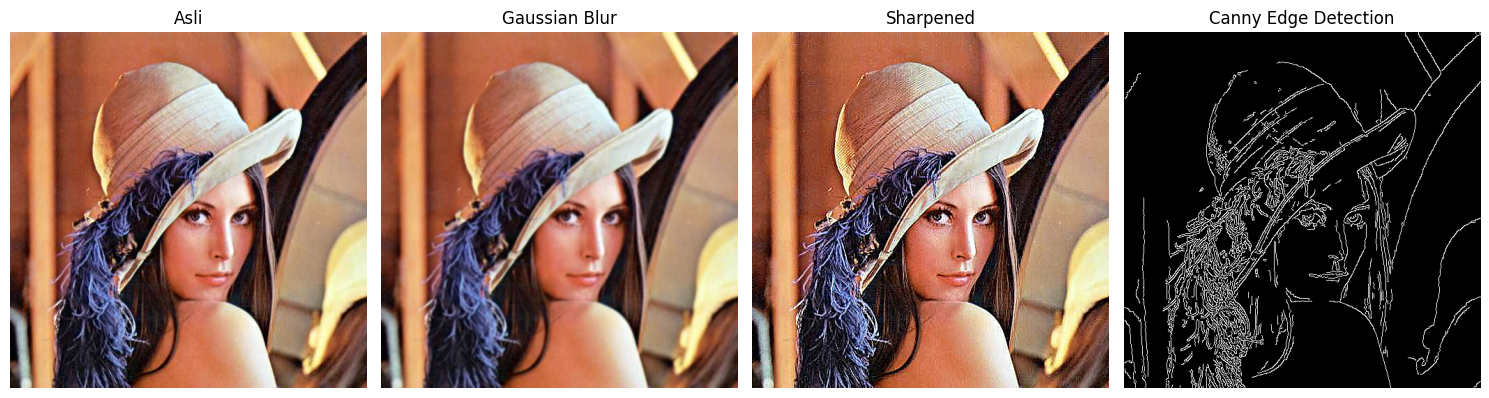

In [28]:
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(img_gray, 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)

show_side_by_side(
    [img, blur, sharpened, edges],
    ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"]
)

Percobaan 2:

Pada percobaan 2 berikut ini akan dilakukan filtering modern dari Library OpenCV. Dua filter yang akan
digunakan adalah Bilateral Filtering dan Guided Filter.

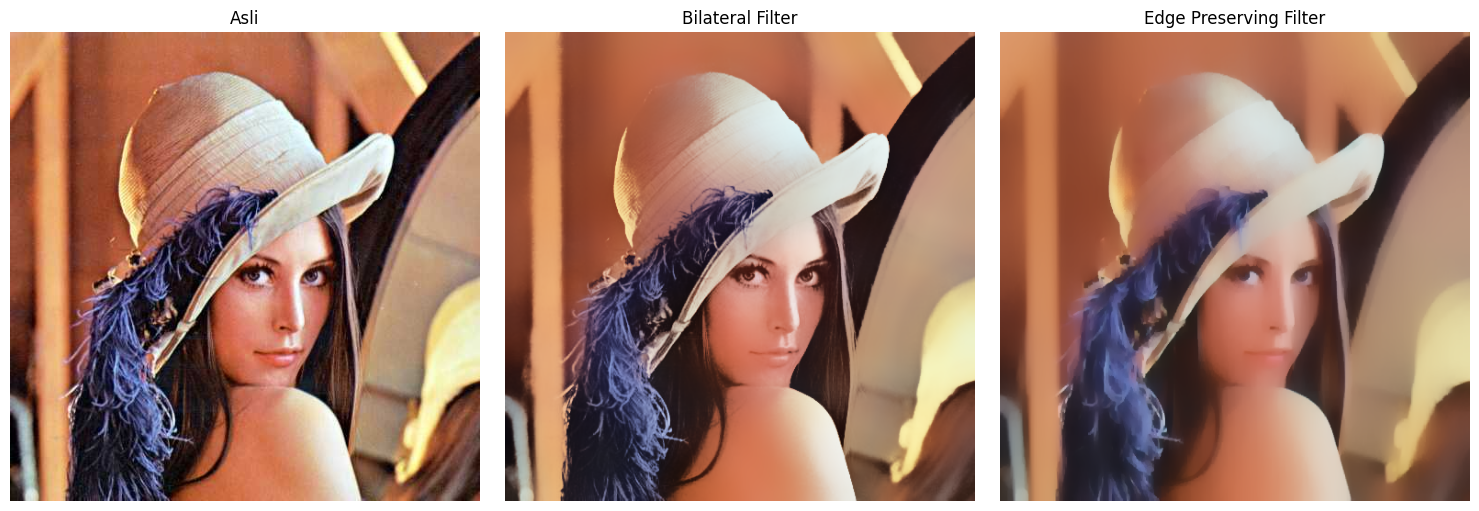

In [29]:
bilateral = cv.bilateralFilter(img, 50, 100, 100)

edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)
show_side_by_side([img, bilateral, edge_preserve], ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

Percobaan 3:

Percobaan kali ini akan mencoba melihat proses Filtering pada CNN (bagian Feature Map), lakukan
running code beberapa kali dan perhatikan hasil outputnya. Apa yang dapat kamu simpulkan dari hasil
keluaran tersebut.

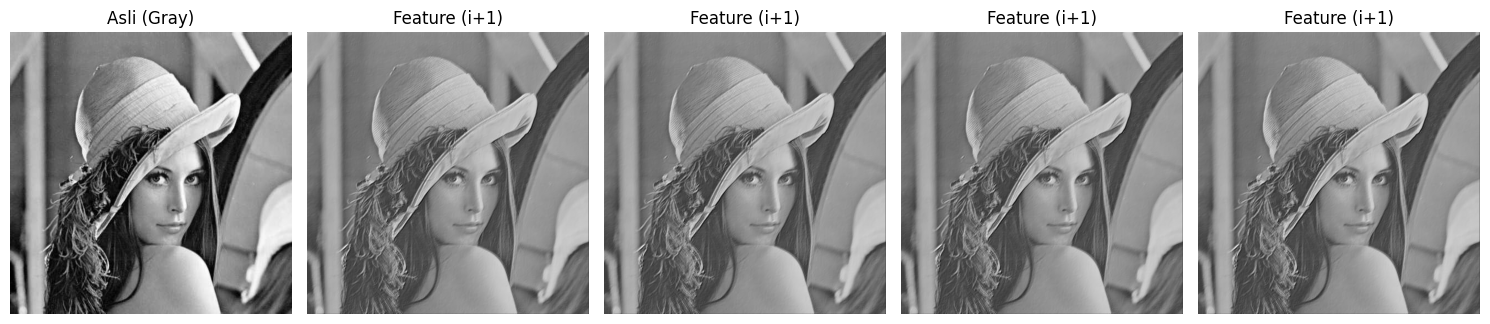

In [30]:
import torch
import torch.nn as nn
class SimpleCNN (nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride = 1, padding = 1)

  def forward(self, x):
    return self.conv1(x)

model = SimpleCNN()

img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

with torch.no_grad():
  features=model(img_tensor)

feature_maps = [features [0,1].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature (i+1)" for i in range(len(feature_maps))])

Percobaan 4:

Percobaan kali ini akan melakukan efek Beauty dan Vintage yang biasanya digunakan pada Aplikasi
popular saat ini. Filter yang digunakan merupakan kombinasi dari filter tradisional. Perlu diketahui
untuk filter aplikasi popular bisa jadi tidak menggunakan metode yang sama. Pada Aplikasi popular
bisa jadi menggunakan model GenAI dengan data Training untuk memberikan hasil yang lebih akurat.

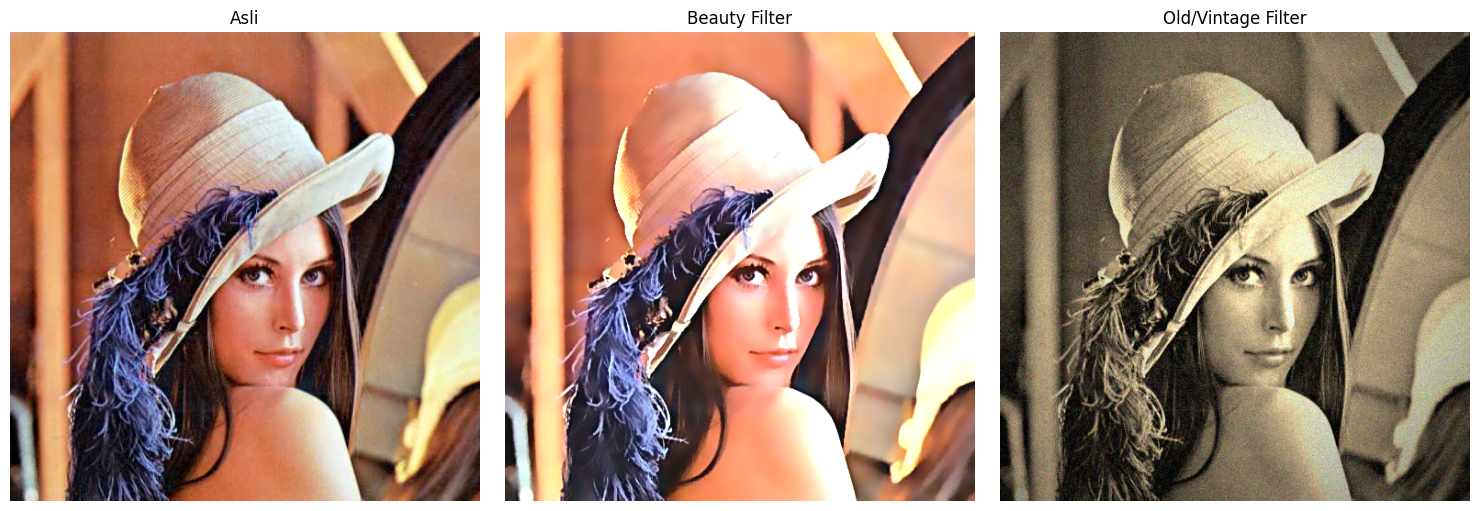

In [31]:
smooth = cv.bilateralFilter (img, d=15, sigmaColor=75, sigmaSpace=75)

gaussian = cv.GaussianBlur (smooth, (0,0), 3)
sharpened = cv.addWeighted (smooth, 1.5, gaussian, -0.5, 0)

alpha = 1.2
beta = 15
beauty = cv.convertScaleAbs (sharpened, alpha=alpha, beta=beta)


sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel (cols, cols*0.6)
kernel_y = cv.getGaussianKernel (rows, rows *0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
  vignette [:,:,i] = vignette [:,:,i] * mask

noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype (np.int16) + noise, 0, 255).astype(np. uint8)

show_side_by_side([img, beauty, old_img], ["Asli", "Beauty Filter", "Old/Vintage Filter"])

Percobaan 5:

Percobaan 5 akan menunjukkan pada anda filter anime / cartoon menggunakan kombinasi filter
tradisional.

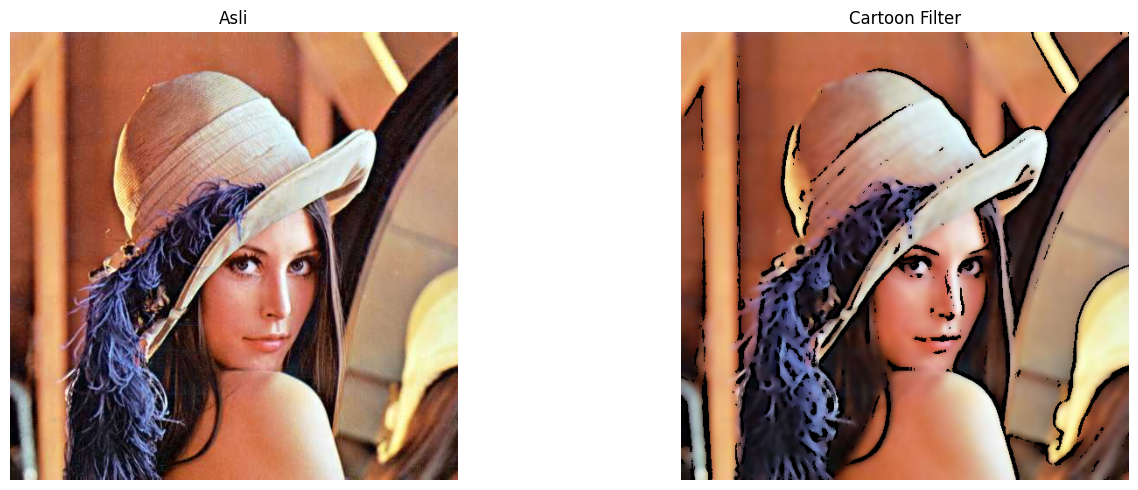

In [32]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 9)

color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

cartoon = cv.bitwise_and (color, color, mask=edges)

show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

Percobaan 6:

Pada Percobaan 6 akan ditunjukkan contoh Filter Malam.

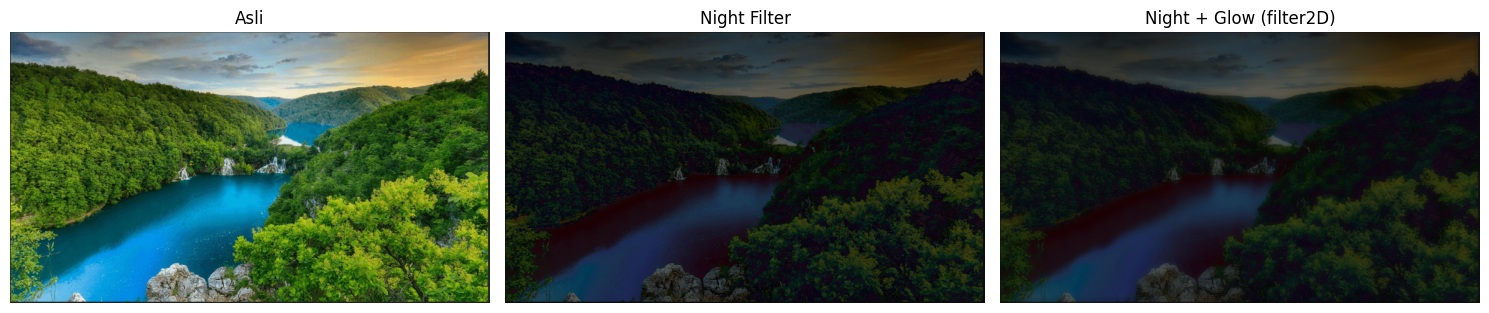

In [36]:
#Night Filter
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/jungle.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs (img, alpha=0.7, beta=-40) # Modified alpha and beta
# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (0, 0, 0)) # Modified blue_tint values (BGR)
night = cv.addWeighted (night, 0.7, blue_tint, 0.3, 0) # Modified alpha and beta for blending
# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)
# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.6, glow, 0.4, 0) # Modified alpha and beta for blending
show_side_by_side([img, night, night_glow], ["Asli", "Night Filter", "Night + Glow (filter2D)"])

Percobaan 7

Percobaan 7 menunjukkan Filter Pagi dan Pagi ditambahkan efek kabut.

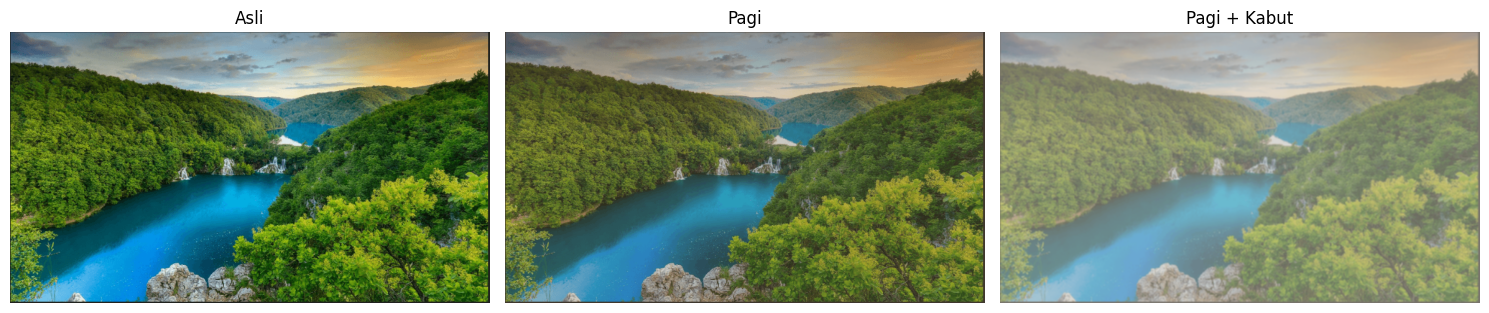

In [37]:
#Filter Suasana pagi dan Kabut
#====================================
# Step 1: Kurangi kontras & cerahkan
#====================================
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs (img, alpha=alpha, beta=beta)

#=================================================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
#=================================================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted (soft, 0.8, warm_tint, 0.2, 0)


#======================================================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
#======================================================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah Layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted (kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side ([img, pagi, kabut], ["Asli", "Pagi", "Pagi + Kabut"])